# Análise Exploratória de Sprints Ágeis
Este notebook tem como objetivo explorar os dados sintéticos de sprints ágeis gerados previamente.  
Vamos analisar métricas de produtividade, complexidade e entrega, e preparar o dataset para modelagem de Machine Learning.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from openpyxl import load_workbook

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor


pd.set_option("display.max_columns", 50)
sns.set(style="whitegrid")
%matplotlib inline


In [2]:
df = pd.read_csv("../sprints_simuladas.csv")
df.head()

sprint_id data_inicio    data_fim  qtd_membros  duracao_dias  \
0  Sprint_01  2025-01-01  2025-01-21            5            20   
1  Sprint_02  2025-01-22  2025-02-05            6            14   
2  Sprint_03  2025-02-06  2025-02-26            7            20   
3  Sprint_04  2025-02-27  2025-03-12            6            13   
4  Sprint_05  2025-03-13  2025-03-28            5            15   

   cartoes_previstos  cartoes_entregues  story_points_previstos  \
0                 23                 22                    1000   
1                 49                 41                     420   
2                 49                 36                     700   
3                 31                 26                     546   
4                 48                 45                     525   

   story_points_entregues tipo_dominio  complexidade_media  percentual_bugs  \
0                     711        Dados                 2.5             0.20   
1                     319        Dados                 2.4             0.05   
2                     568        Dados                 2.9             0.12   
3                     533          API                 3.7             0.10   
4                     458        Dados                 2.1             0.17   

   percentual_retrabalho  velocidade_passada  produtividade_estimada  
0                   0.05               32.57                   200.0  
1                   0.13               45.12                    70.0  
2                   0.18               69.79                   100.0  
3                   0.10               47.70                    91.0  
4                   0.12               42.69                   105.0

In [3]:
teste = pd.read_excel("../sprints_formatadas_teste.xlsx")

teste.head()

sprint_id data_inicio   data_fim  qtd_membros  duracao_dias  \
0  Sprint_01  2025-01-01 2025-01-21            5            20   
1  Sprint_02  2025-01-22 2025-02-05            6            14   
2  Sprint_03  2025-02-06 2025-02-26            7            20   
3  Sprint_04  2025-02-27 2025-03-12            6            13   
4  Sprint_05  2025-03-13 2025-03-28            5            15   

   cartoes_previstos  cartoes_entregues  story_points_previstos  \
0                 23                 22                    1000   
1                 49                 41                     420   
2                 49                 36                     700   
3                 31                 26                     546   
4                 48                 45                     525   

   story_points_entregues tipo_dominio  complexidade_media  percentual_bugs  \
0                     711        Dados                 2.5             0.20   
1                     319        Dados                 2.4             0.05   
2                     568        Dados                 2.9             0.12   
3                     533          API                 3.7             0.10   
4                     458        Dados                 2.1             0.17   

   percentual_retrabalho  velocidade_passada  produtividade_estimada  
0                   0.05               32.57                     200  
1                   0.13               45.12                      70  
2                   0.18               69.79                     100  
3                   0.10               47.70                      91  
4                   0.12               42.69                     105

##### Calculando velocidade media das sprints

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sprint_id               5000 non-null   object 
 1   data_inicio             5000 non-null   object 
 2   data_fim                5000 non-null   object 
 3   qtd_membros             5000 non-null   int64  
 4   duracao_dias            5000 non-null   int64  
 5   cartoes_previstos       5000 non-null   int64  
 6   cartoes_entregues       5000 non-null   int64  
 7   story_points_previstos  5000 non-null   int64  
 8   story_points_entregues  5000 non-null   int64  
 9   tipo_dominio            5000 non-null   object 
 10  complexidade_media      5000 non-null   float64
 11  percentual_bugs         5000 non-null   float64
 12  percentual_retrabalho   5000 non-null   float64
 13  velocidade_passada      5000 non-null   float64
 14  produtividade_estimada  5000 non-null   

In [5]:
df.isna().sum()

sprint_id                 0
data_inicio               0
data_fim                  0
qtd_membros               0
duracao_dias              0
cartoes_previstos         0
cartoes_entregues         0
story_points_previstos    0
story_points_entregues    0
tipo_dominio              0
complexidade_media        0
percentual_bugs           0
percentual_retrabalho     0
velocidade_passada        0
produtividade_estimada    0
dtype: int64

In [6]:
df.columns

Index(['sprint_id', 'data_inicio', 'data_fim', 'qtd_membros', 'duracao_dias',
       'cartoes_previstos', 'cartoes_entregues', 'story_points_previstos',
       'story_points_entregues', 'tipo_dominio', 'complexidade_media',
       'percentual_bugs', 'percentual_retrabalho', 'velocidade_passada',
       'produtividade_estimada'],
      dtype='object')

In [7]:
quant_columns = ['qtd_membros', 'duracao_dias',
       'cartoes_previstos', 'cartoes_entregues', 'story_points_previstos',
       'story_points_entregues', 'tipo_dominio', 'complexidade_media',
       'percentual_bugs', 'percentual_retrabalho', 'velocidade_passada',
       'produtividade_estimada']

df[quant_columns].describe()

qtd_membros  duracao_dias  cartoes_previstos  cartoes_entregues  \
count  5000.000000   5000.000000        5000.000000        5000.000000   
mean      5.007800     15.555800          34.990200          29.198800   
std       1.420332      3.447617           8.920427           8.236434   
min       3.000000     10.000000          20.000000          14.000000   
25%       4.000000     13.000000          27.000000          22.000000   
50%       5.000000     16.000000          35.000000          29.000000   
75%       6.000000     19.000000          43.000000          35.000000   
max       7.000000     21.000000          50.000000          49.000000   

       story_points_previstos  story_points_entregues  complexidade_media  \
count             5000.000000             5000.000000         5000.000000   
mean               587.442200              498.332000            3.005680   
std                257.374206              226.104903            0.863672   
min                150.000000              107.000000            1.500000   
25%                396.000000              329.000000            2.300000   
50%                540.000000              452.000000            3.000000   
75%                735.000000              627.000000            3.700000   
max               1470.000000             1459.000000            4.500000   

       percentual_bugs  percentual_retrabalho  velocidade_passada  \
count      5000.000000            5000.000000         5000.000000   
mean          0.159570               0.134250           49.840362   
std           0.060599               0.046622           11.518774   
min           0.030000               0.030000           30.010000   
25%           0.110000               0.100000           39.760000   
50%           0.160000               0.130000           49.520000   
75%           0.210000               0.170000           59.797500   
max           0.290000               0.240000           69.990000   

       produtividade_estimada  
count             5000.000000  
mean               117.279000  
std                 37.564581  
min                 50.000000  
25%                 90.000000  
50%                112.000000  
75%                144.000000  
max                210.000000

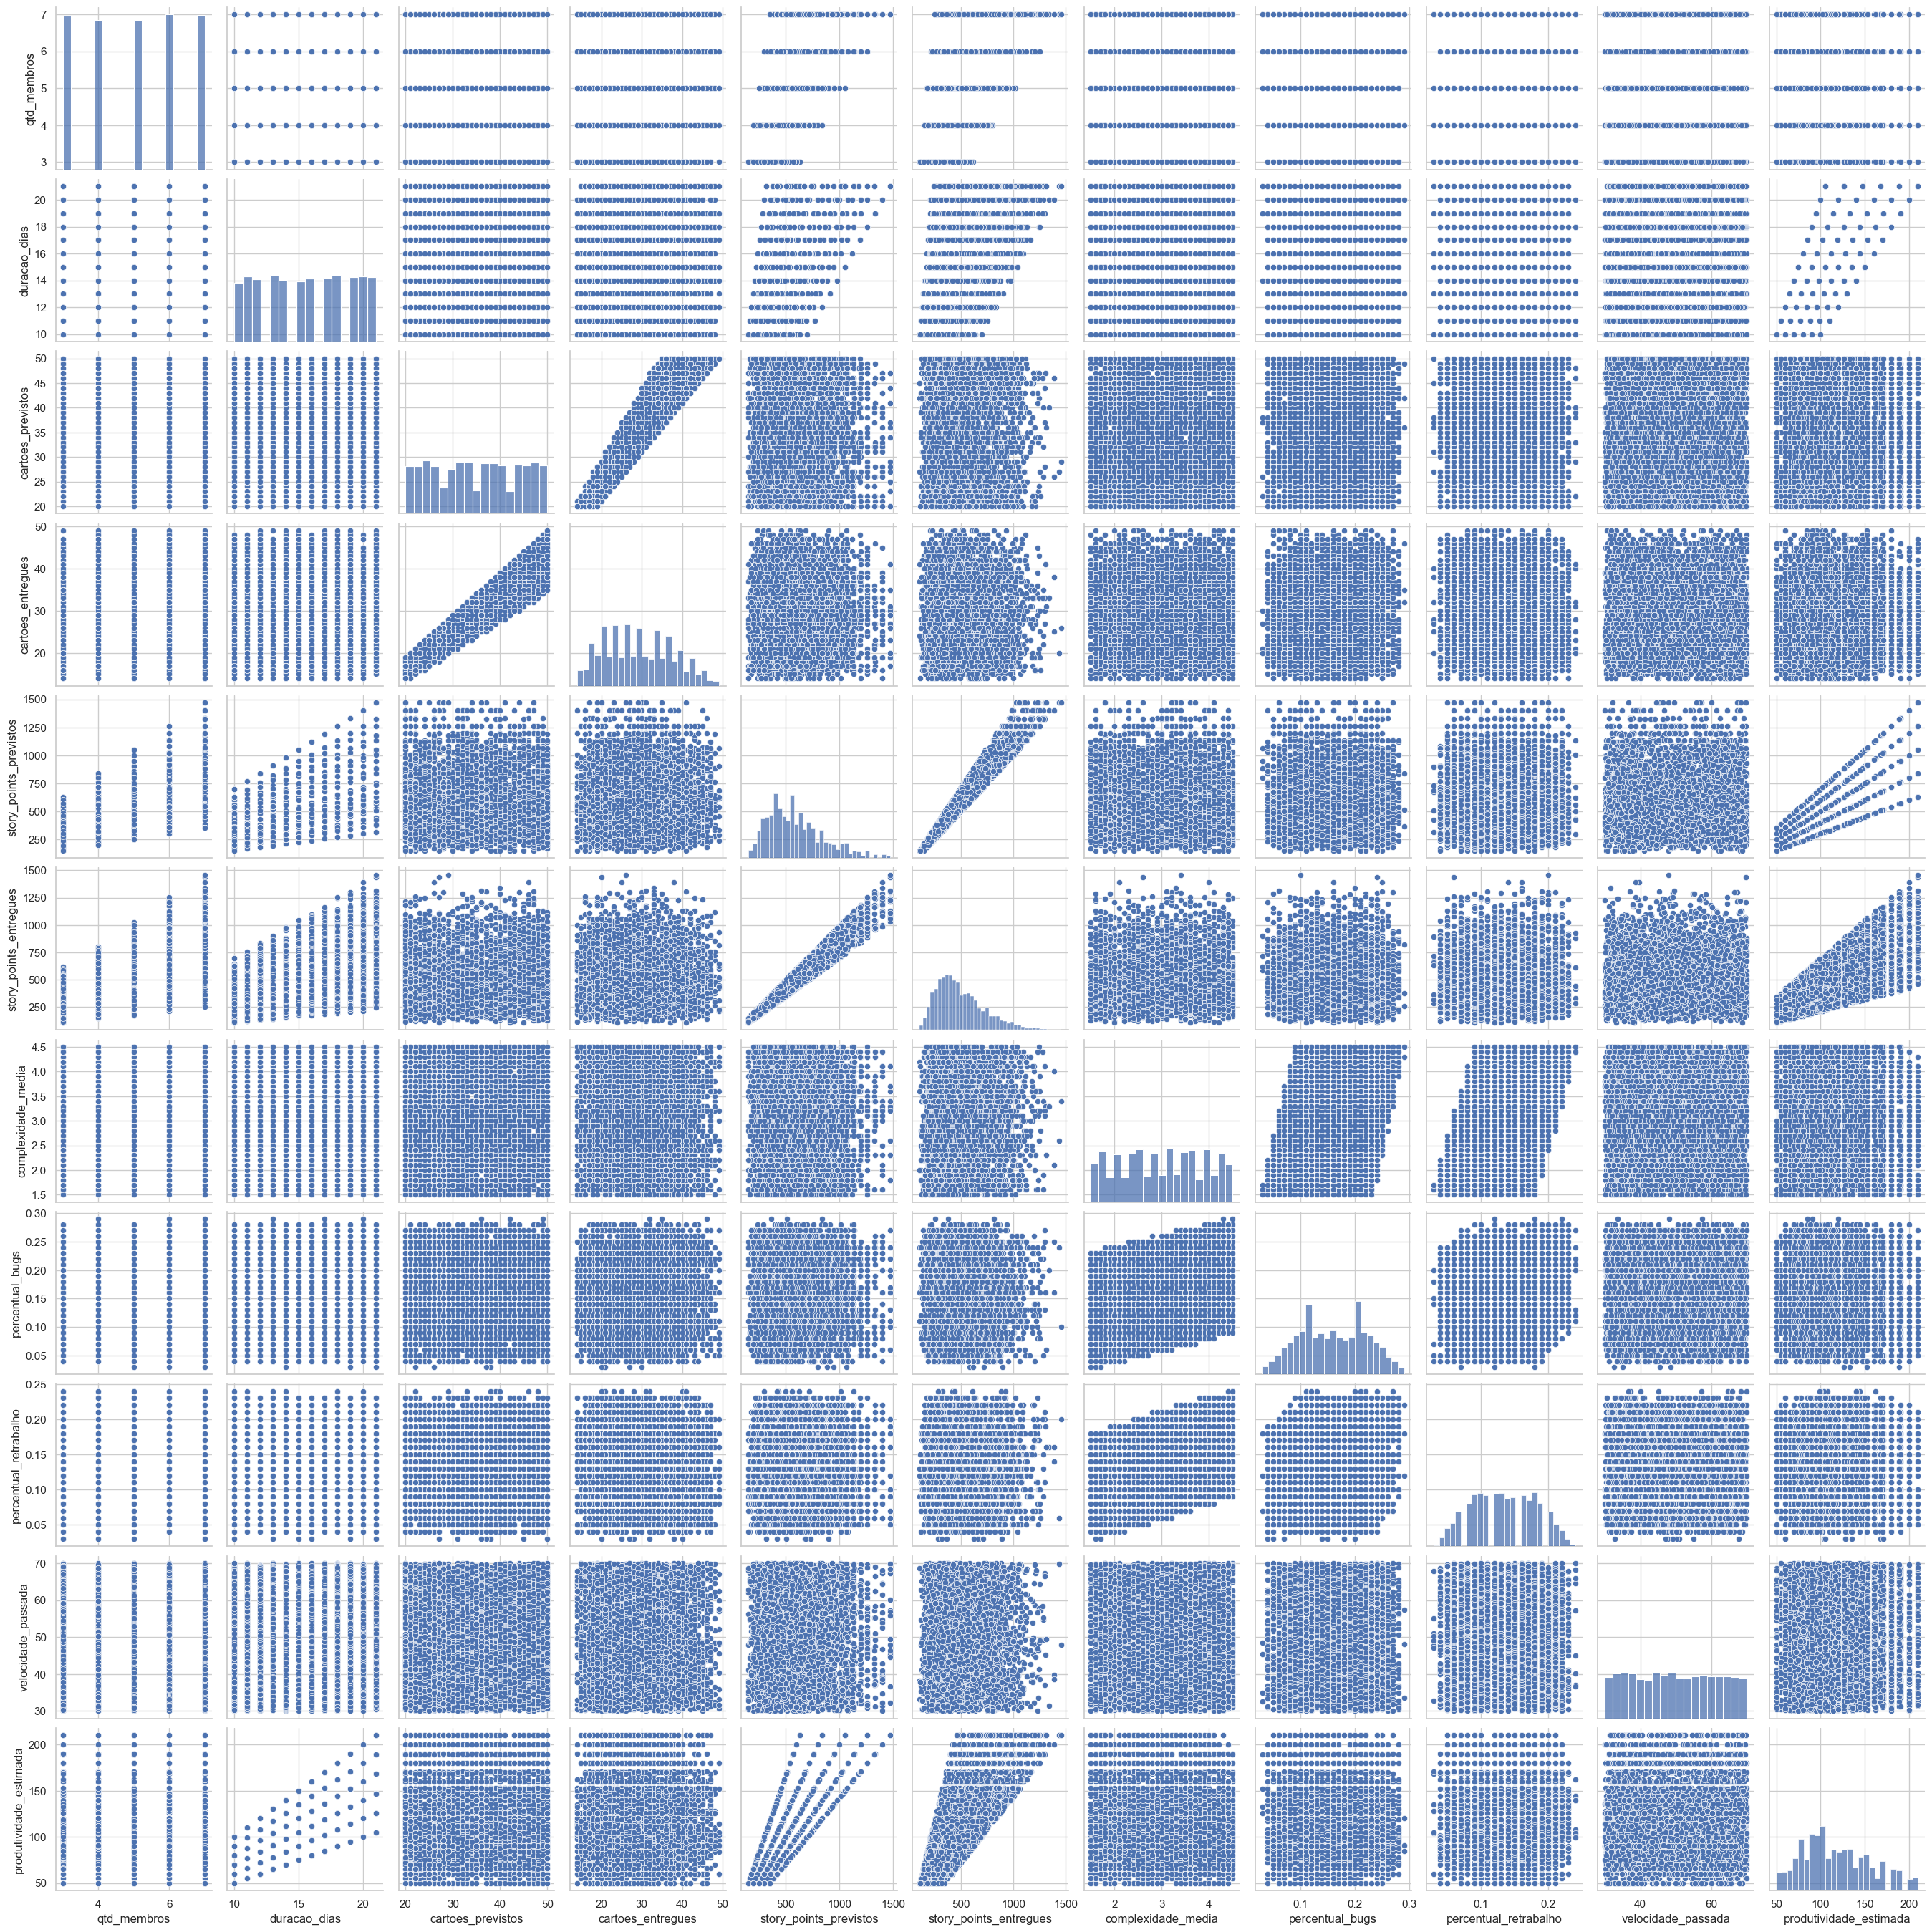

In [8]:
sns.pairplot(df[quant_columns])

## Interpretação

- O histograma indica que as sprints com 3, 4, 5, 6 e 7 membros aparecem com frequência **relativamente uniforme**, o que faz sentido, pois os valores foram gerados aleatoriamente (`random.randint(3,7)`).
- A linha KDE oscila porque a variável é **discreta** (valores inteiros). A curva é apenas uma estimativa contínua da distribuição.
- **Sem viés ou tendência aparente**: cada tamanho de equipe tem aproximadamente a mesma chance de aparecer.
- Não há clusters ou desequilíbrios na distribuição do número de membros por sprint.

## Conclusão para ML

- A variável `qtd_membros` está bem distribuída e pronta para uso em modelos de Machine Learning.  
- Pode ser tratada como **numérica** ou convertida em **categórica**, dependendo do modelo que será utilizado.

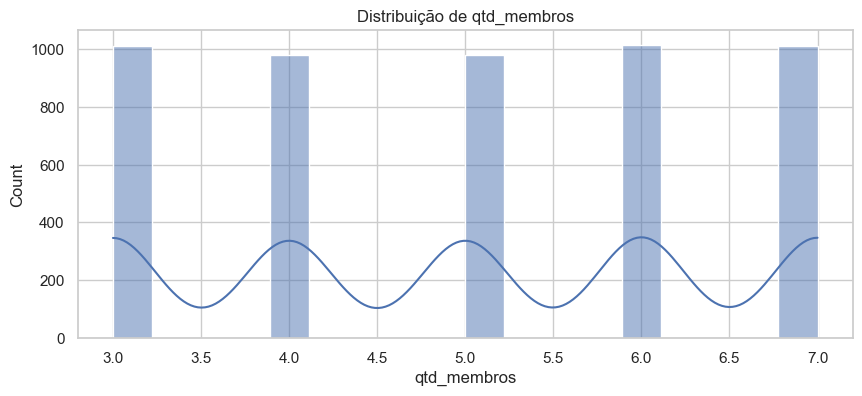

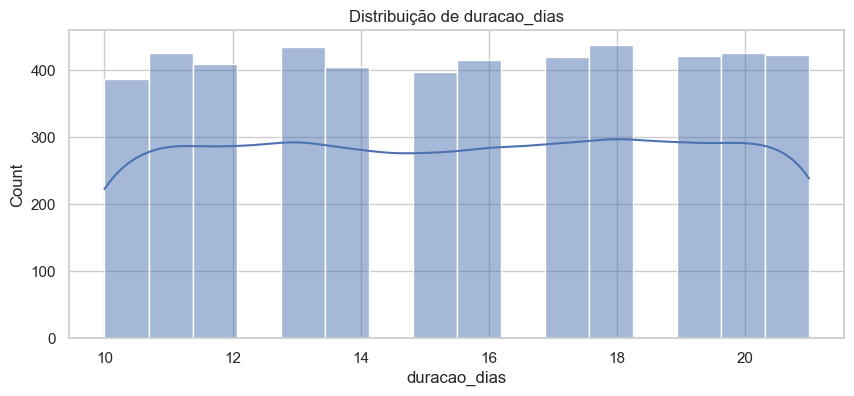

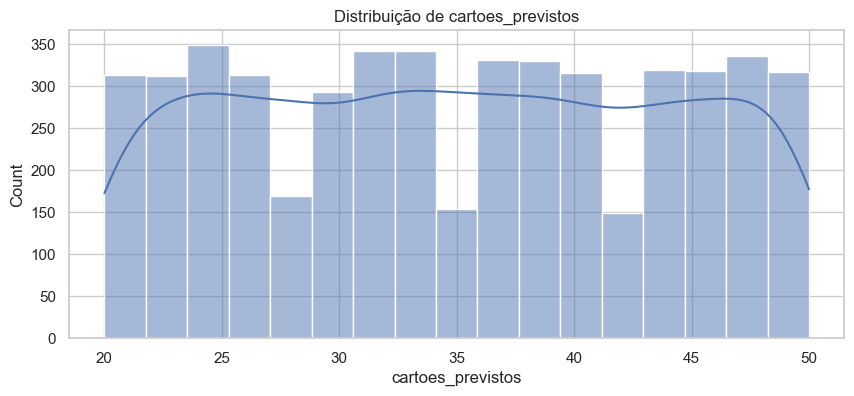

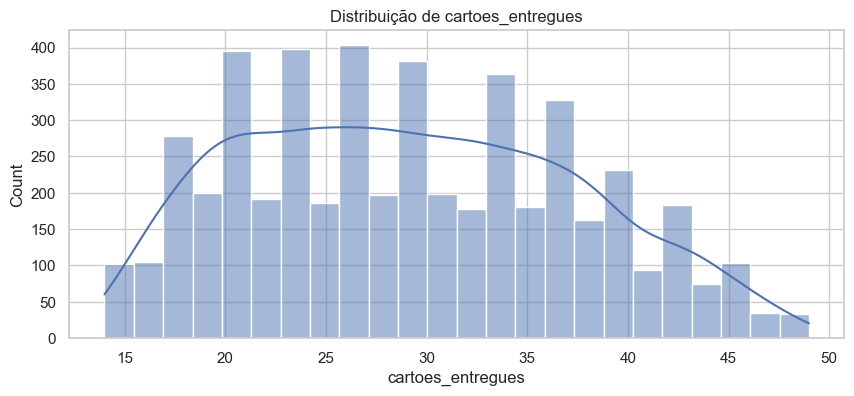

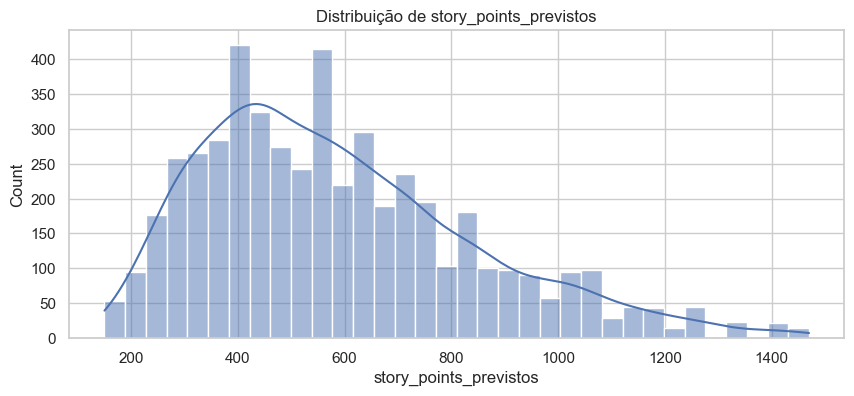

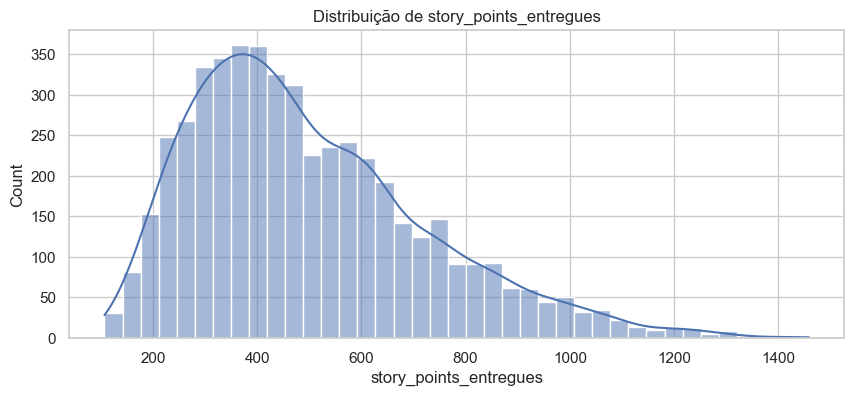

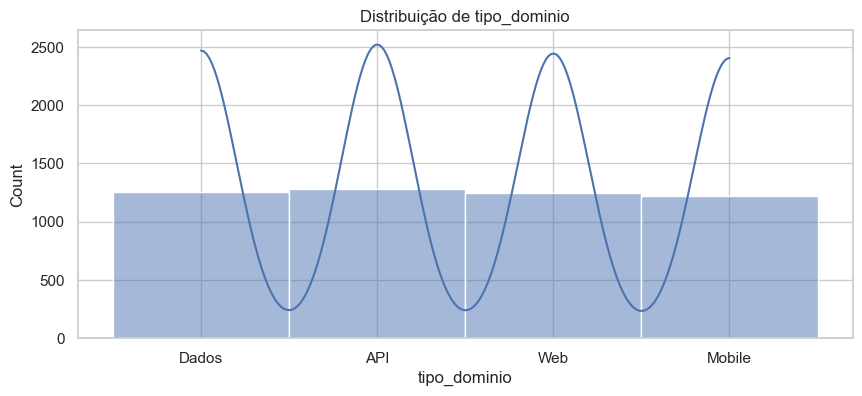

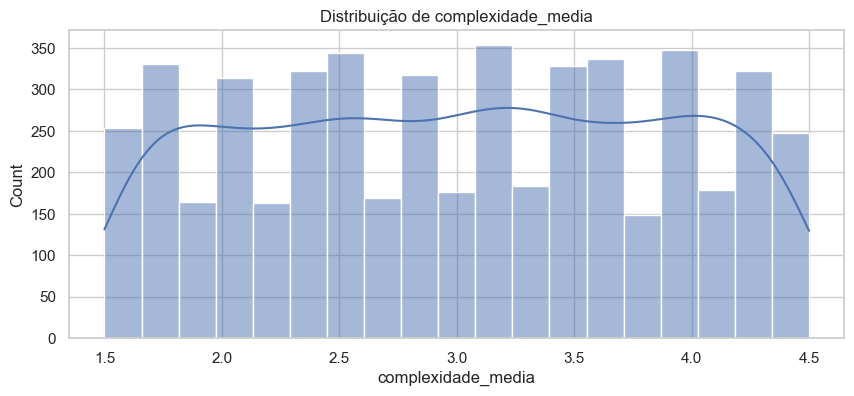

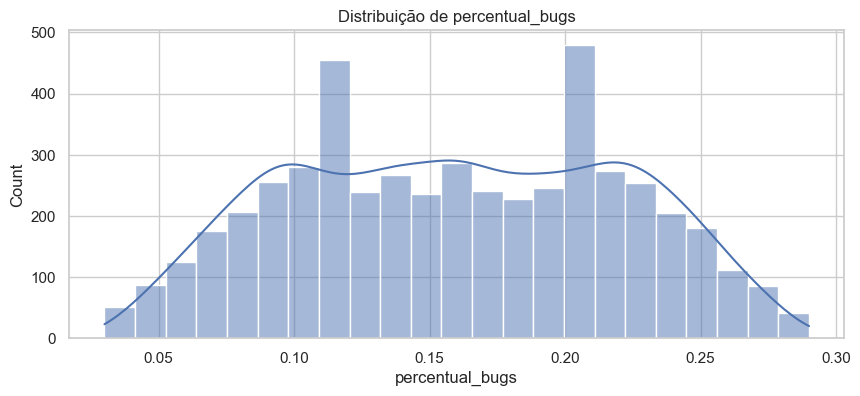

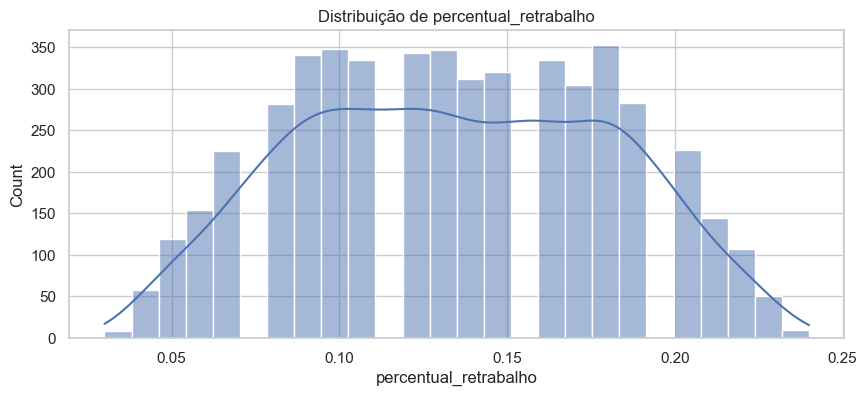

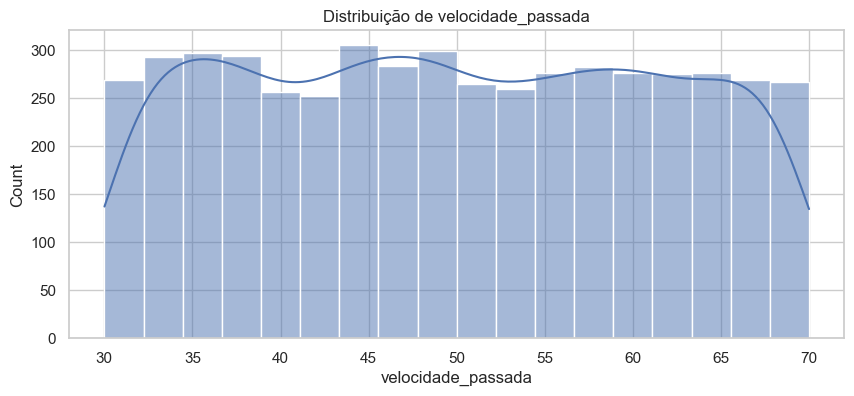

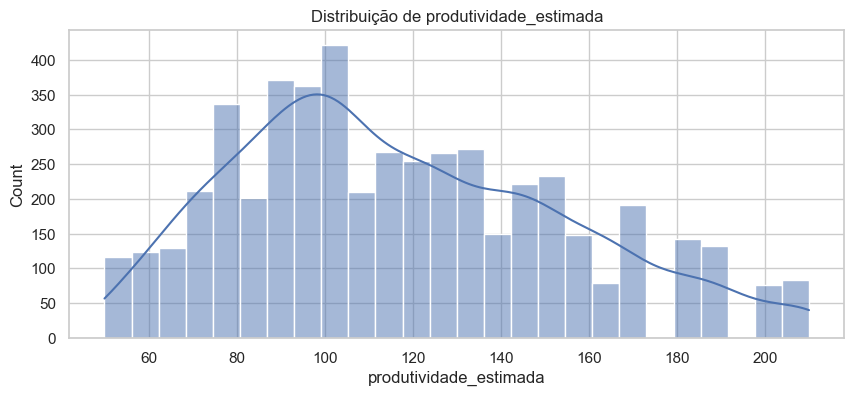

In [9]:
for col in quant_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()

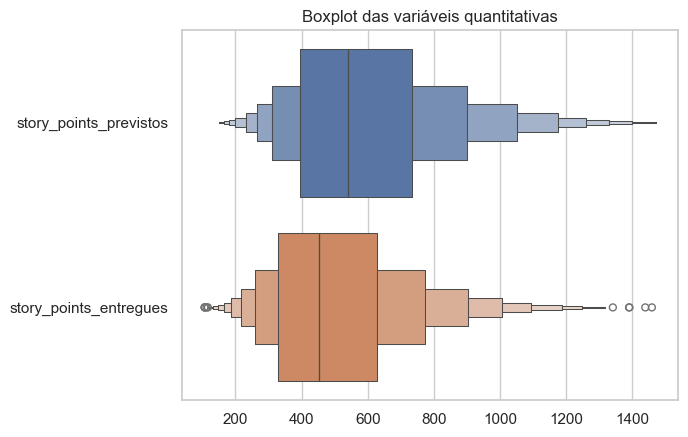

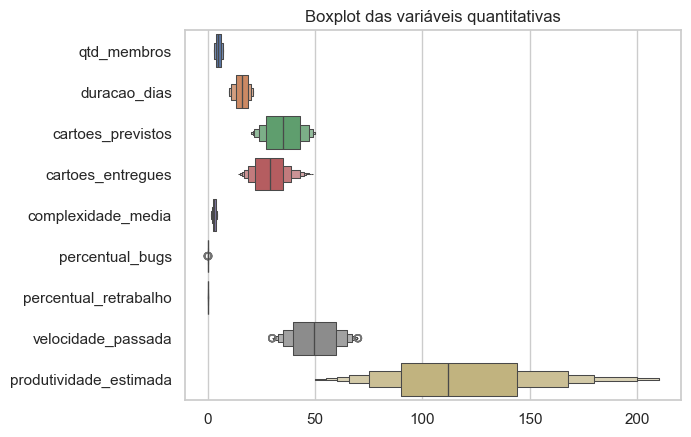

In [10]:
cols1 = ['story_points_previstos', 'story_points_entregues']

cols2 = ['qtd_membros', 'duracao_dias',
       'cartoes_previstos', 'cartoes_entregues', 'complexidade_media',
       'percentual_bugs', 'percentual_retrabalho', 'velocidade_passada',
       'produtividade_estimada']

# Boxplot horizontal
sns.boxenplot(data=df[cols1], orient="h")
plt.title('Boxplot das variáveis quantitativas')
plt.show()

sns.boxenplot(data=df[cols2], orient="h")
plt.title('Boxplot das variáveis quantitativas')
plt.show()

#### Verificando normalidade dos dados para correlação

In [12]:
for col in quant_columns:
    
    try:
        print(f'\nAnalisando a variável: {col}')

        shapiro_test = stats.shapiro(df[col])

        p_value = shapiro_test.pvalue

        estatistics = shapiro_test.statistic

        print(f'Estatística: {estatistics}')
        print(f'P-valor: {p_value}')
        print()
        if p_value > 0.05:
            print("A variável segue uma distribuição normal.") 
        else:
            print("A variável não segue uma distribuição normal.\n")
    except Exception as e:
        print(f'Não foi possível calcular a normalidade para a variável {col}. Erro: {e}')
        continue



Analisando a variável: qtd_membros
Estatística: 0.886548013269497
P-valor: 2.3382677980440085e-51

A variável não segue uma distribuição normal.


Analisando a variável: duracao_dias
Estatística: 0.9404350897791741
P-valor: 6.83533449736671e-41

A variável não segue uma distribuição normal.


Analisando a variável: cartoes_previstos
Estatística: 0.9528213991618963
P-valor: 2.0764073713097884e-37

A variável não segue uma distribuição normal.


Analisando a variável: cartoes_entregues
Estatística: 0.9758966401977434
P-valor: 2.800610842419086e-28

A variável não segue uma distribuição normal.


Analisando a variável: story_points_previstos
Estatística: 0.9501911904633419
P-valor: 3.3212574508356503e-38

A variável não segue uma distribuição normal.


Analisando a variável: story_points_entregues
Estatística: 0.9457314445105137
P-valor: 1.7588826017957756e-39

A variável não segue uma distribuição normal.


Analisando a variável: tipo_dominio
Não foi possível calcular a normalidade para

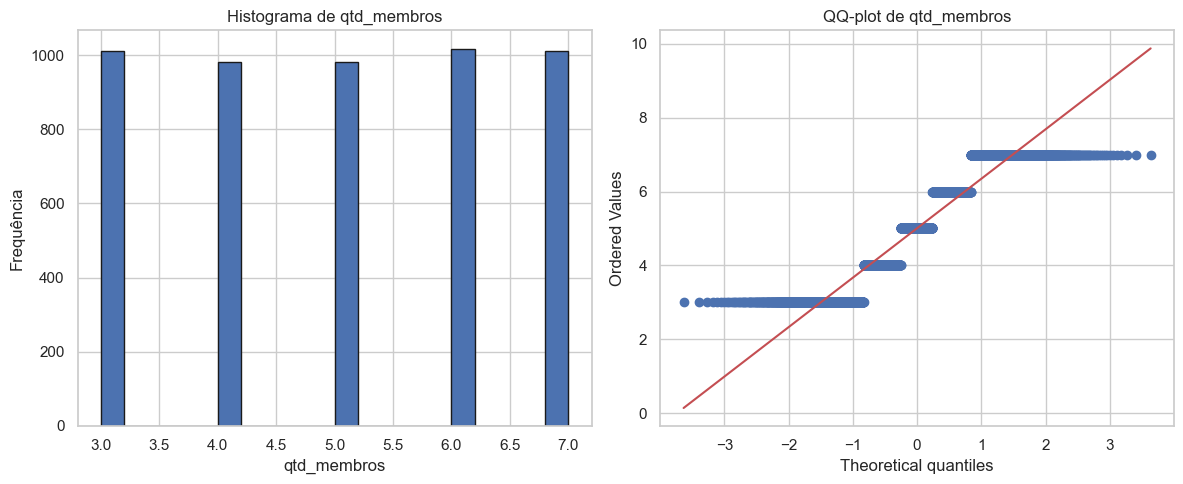

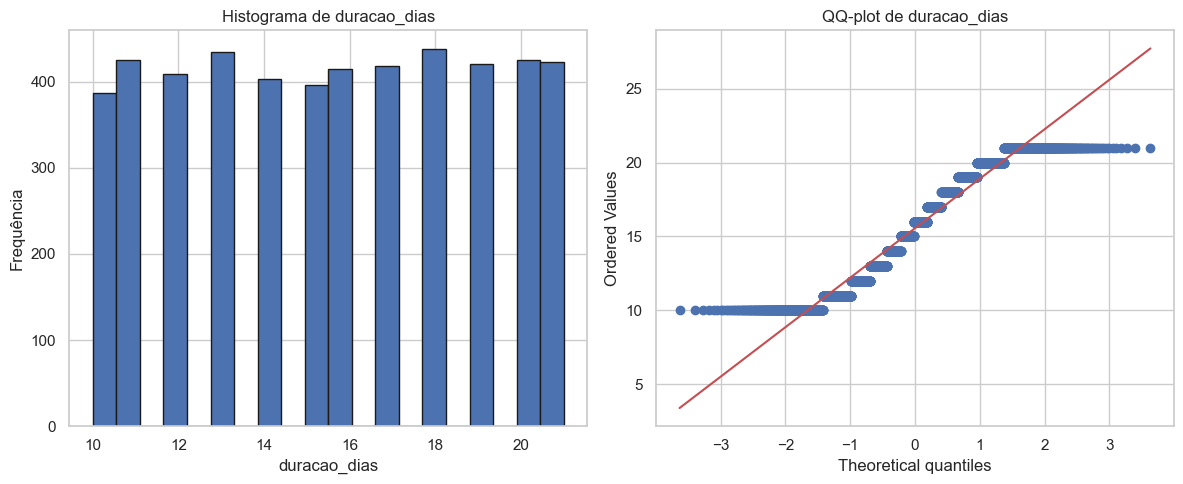

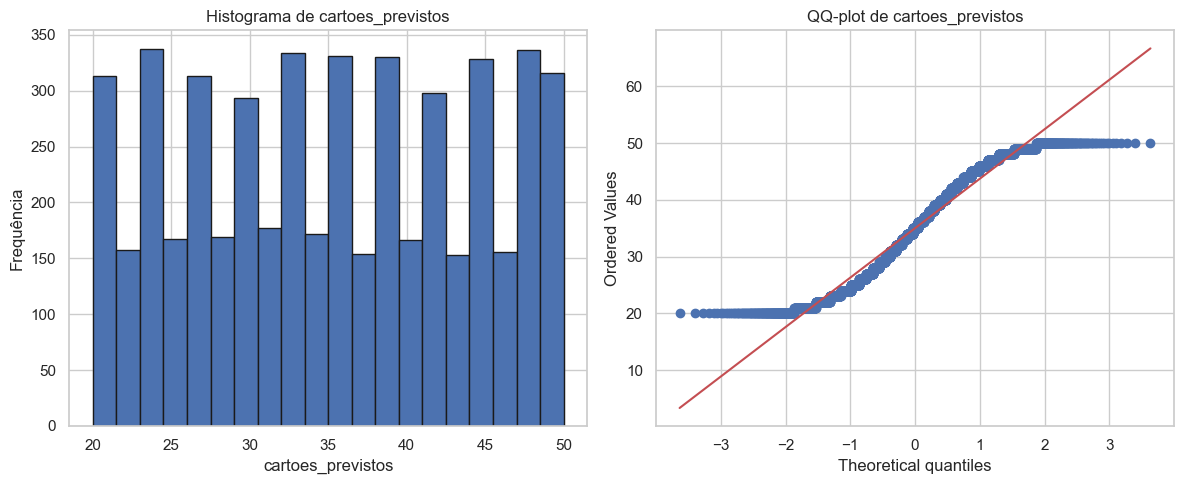

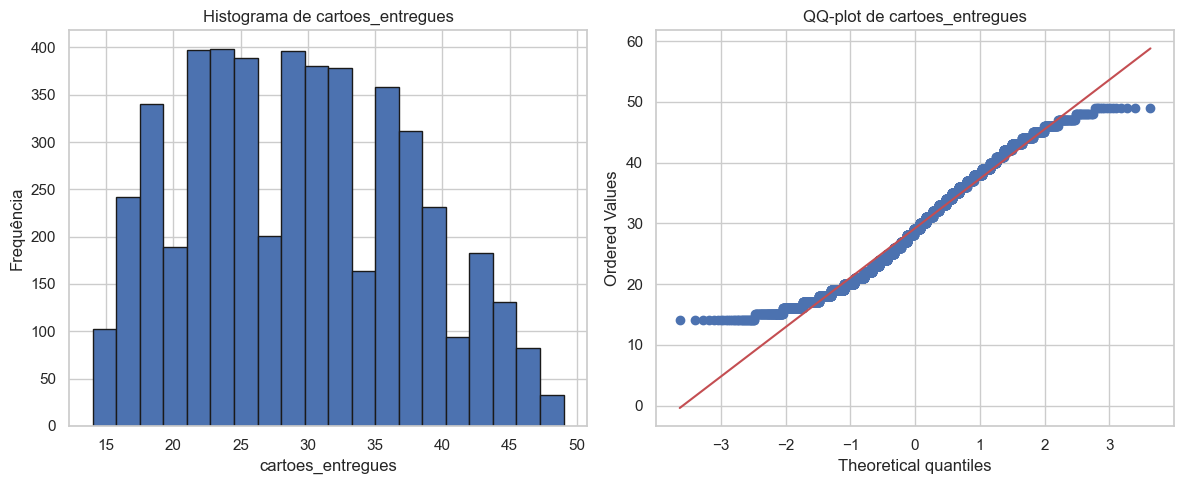

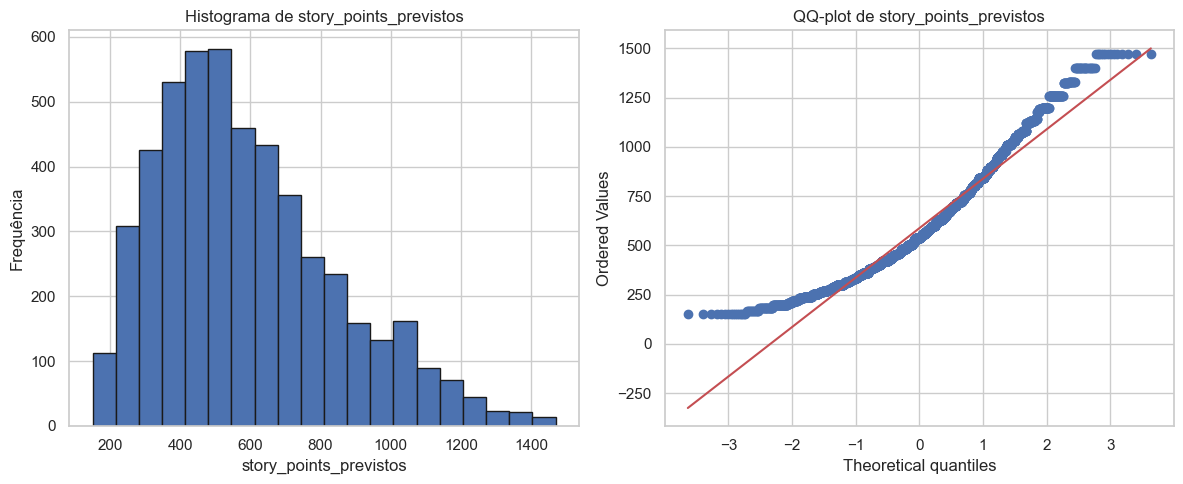

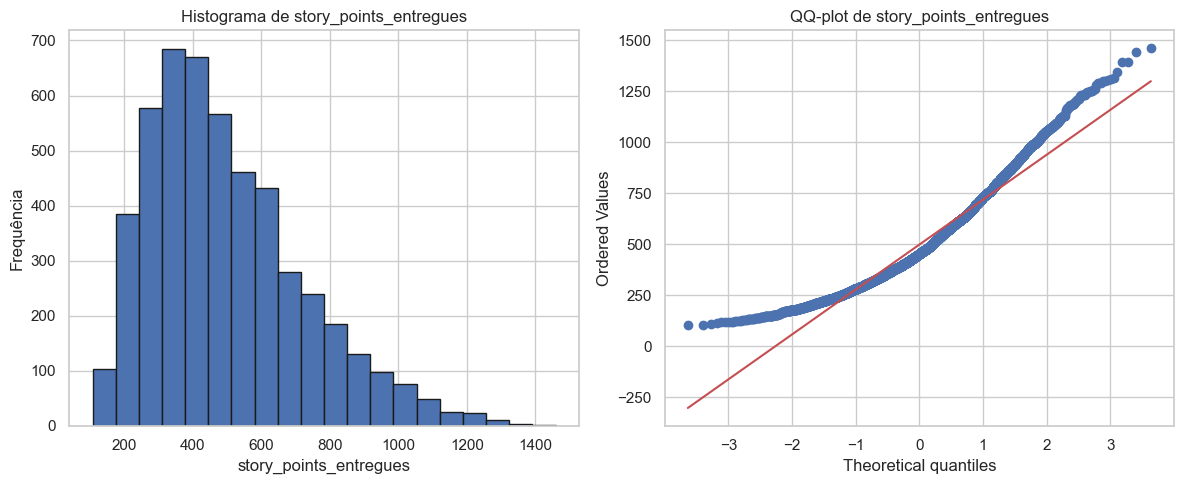

Não foi possível calcular a normalidade para a variável tipo_dominio. Erro: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


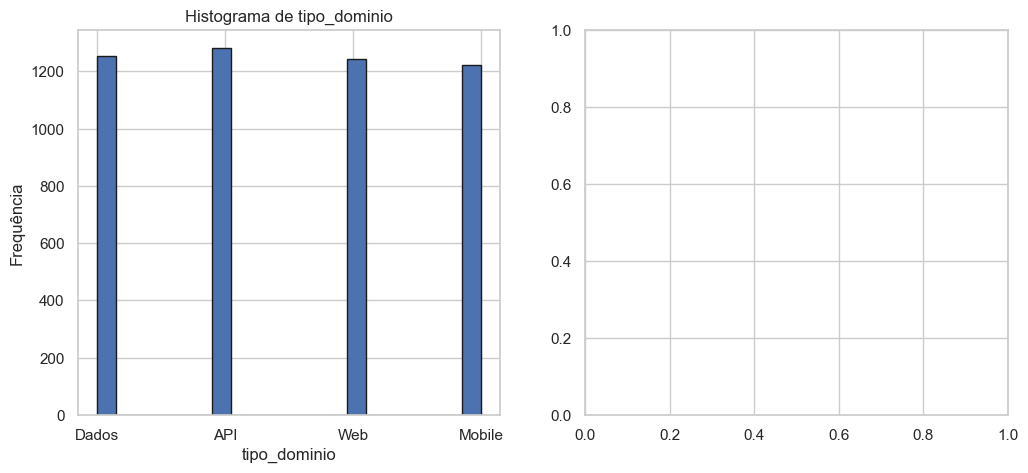

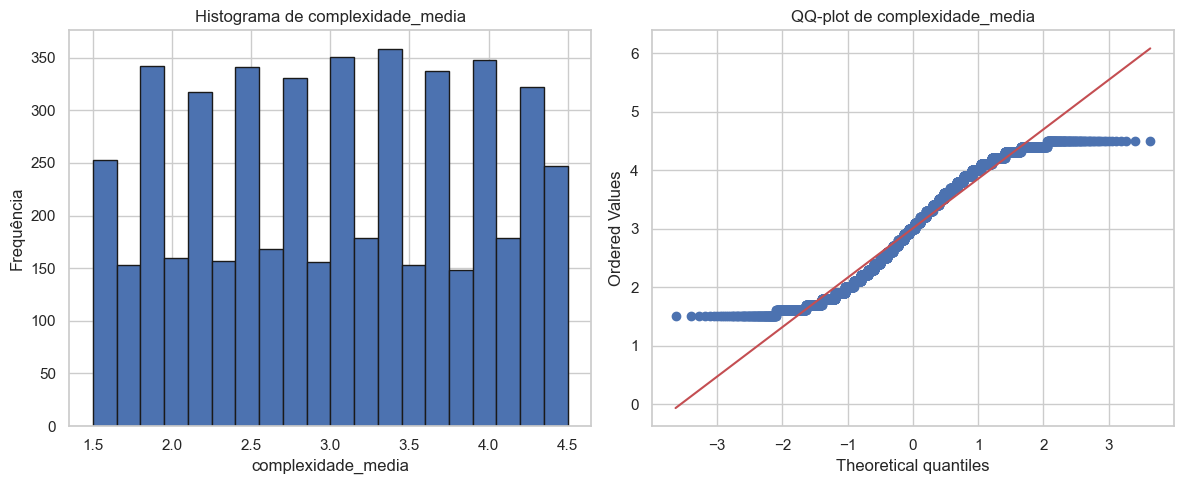

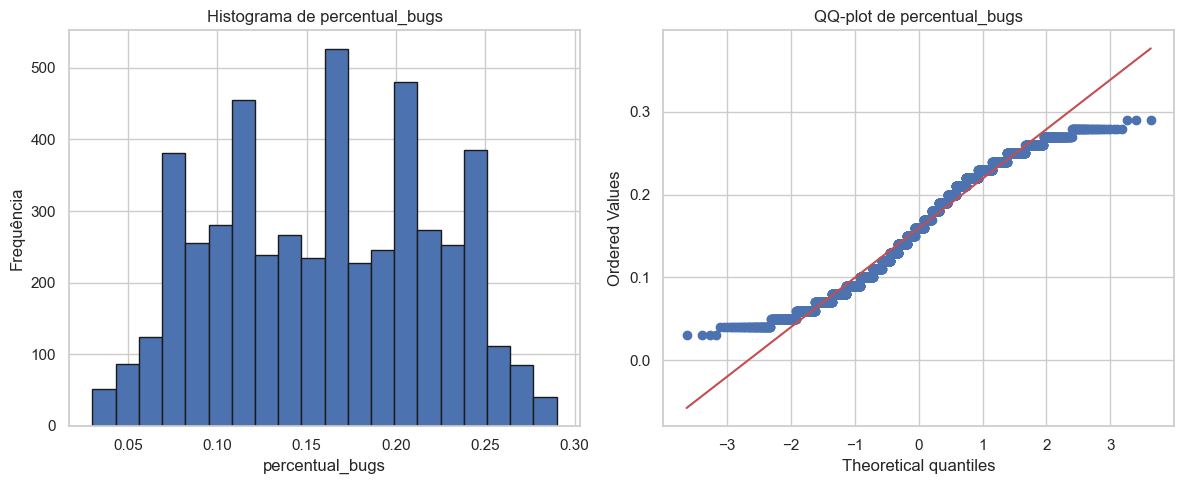

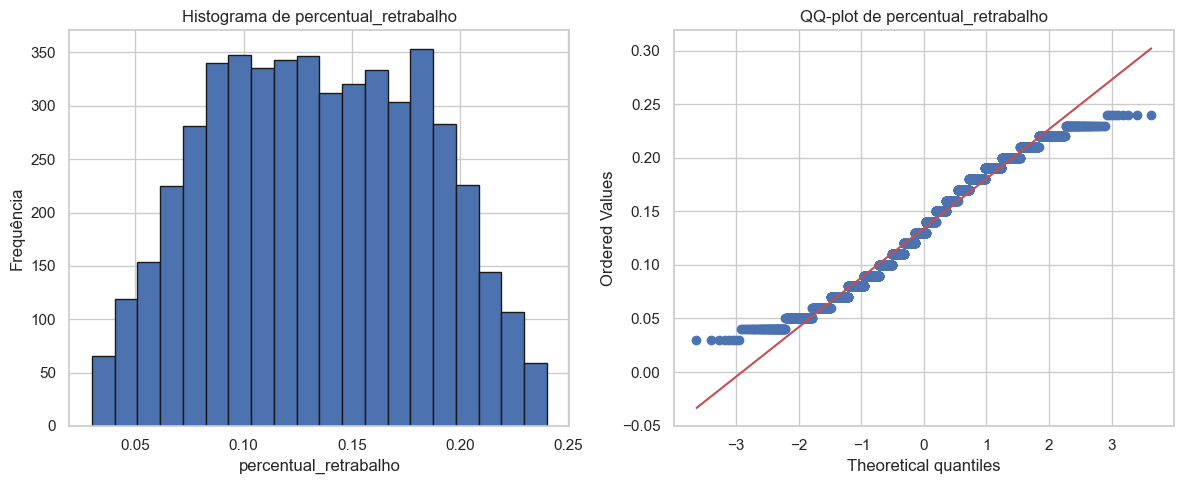

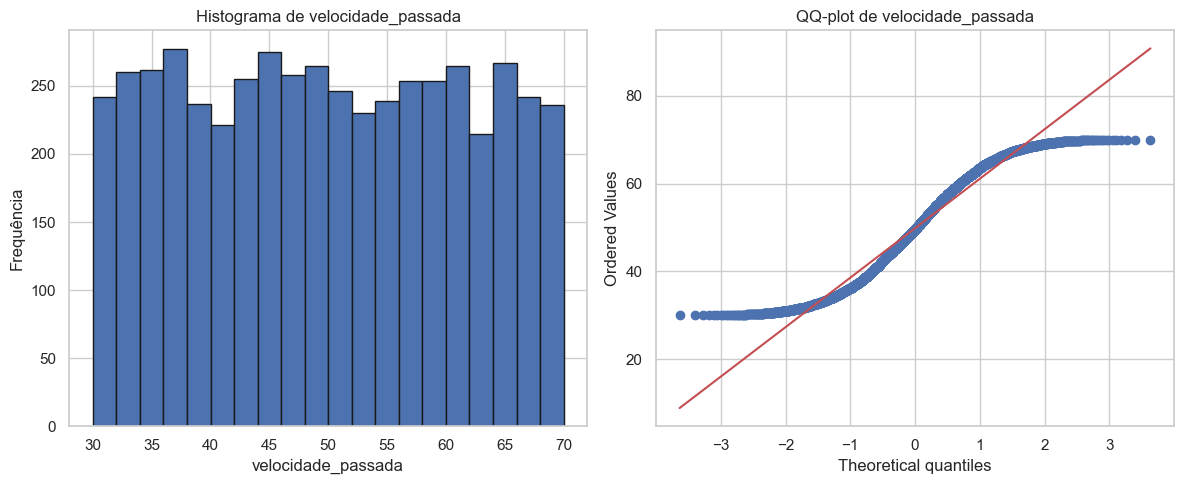

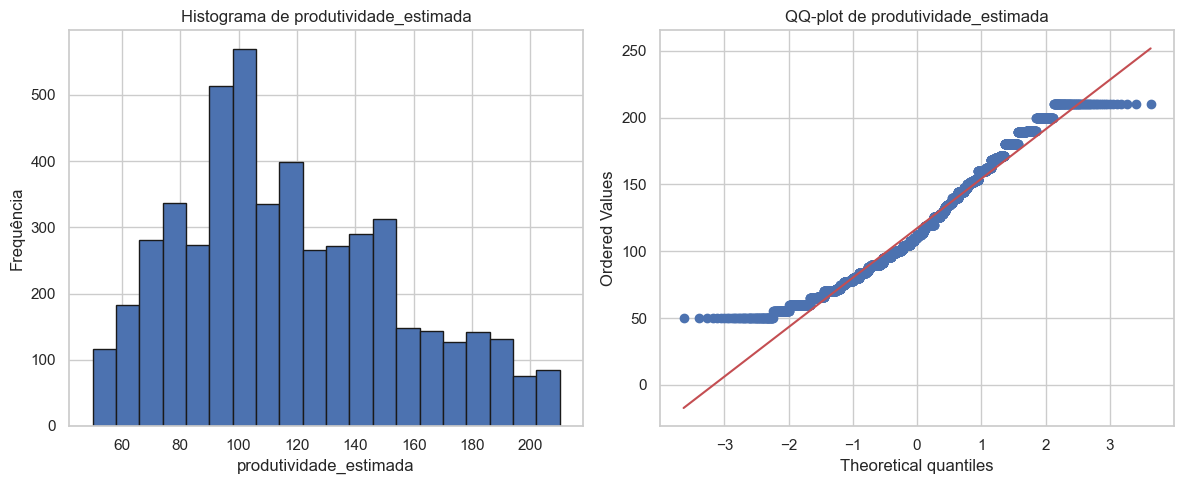

In [13]:
for col in quant_columns:
    try: 
        data = df[col]

        # Histograma
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.hist(data, bins=20, edgecolor='k')
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frequência')

        # QQ-plot
        plt.subplot(1,2,2)
        stats.probplot(data, plot=plt)
        plt.title(f'QQ-plot de {col}')

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f'Não foi possível calcular a normalidade para a variável {col}. Erro: {e}')
        continue

In [ ]:
df.columns

Index(['sprint_id', 'data_inicio', 'data_fim', 'qtd_membros', 'duracao_dias',
       'cartoes_previstos', 'cartoes_entregues', 'story_points_previstos',
       'story_points_entregues', 'tipo_dominio', 'complexidade_media',
       'percentual_bugs', 'percentual_retrabalho', 'velocidade_passada',
       'produtividade_estimada'],
      dtype='object')

#### Verificando algumas correlações
- complexidade media x qtd de membros (Spearman)
- qtd de membros x duração de dias
- tipo de domino x complexidade media
- qtd de membros x produtividade estimada

In [14]:
df['tipo_dominio'].value_counts()

tipo_dominio
API       1281
Dados     1255
Web       1242
Mobile    1222
Name: count, dtype: int64

In [15]:
df['complexidade_cat'] = pd.cut(df['complexidade_media'], bins=3, labels=['Baixa', 'Média', 'Alta'])

# Tabela de contingência
tabela = pd.crosstab(df['tipo_dominio'], df['complexidade_cat'])

In [16]:
corr, p_value, dof, expected = stats.chi2_contingency(tabela)
print(f'Correlação de Pearson entre tipo_dominio e complexidade_media: {corr},  p-valor: {p_value}')
print(f"grus de liberdade: {dof}")
print(f"esperado: \n{expected}")

Correlação de Pearson entre tipo_dominio e complexidade_media: 10.666772871298509,  p-valor: 0.09923754815129672
grus de liberdade: 6
esperado: 
[[441.4326 434.5152 405.0522]
 [432.473  425.696  396.831 ]
 [421.1012 414.5024 386.3964]
 [427.9932 421.2864 392.7204]]


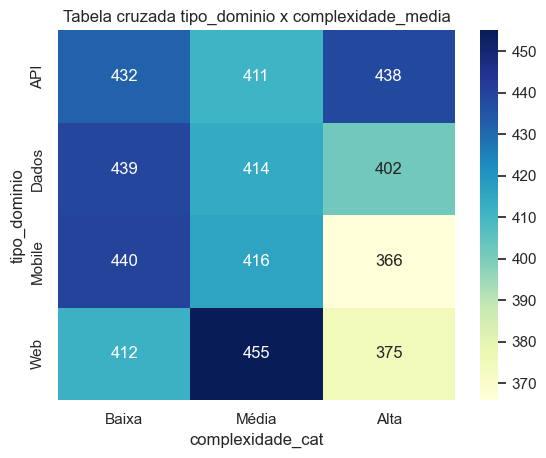

In [17]:
sns.heatmap(tabela, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Tabela cruzada tipo_dominio x complexidade_media")
plt.show()

In [18]:
corr, p_value = stats.spearmanr(df['complexidade_media'], df['qtd_membros'])
print(f'Correlação de Spearman entre complexidade_media e qtd_membros: {corr}, p-valor: {p_value}')

corr, p_value = stats.pearsonr(df['qtd_membros'], df['duracao_dias'])
print(f'Correlação de Pearson entre qtd_membros e duracao_dias: {corr}, p-valor: {p_value}')

corr, p_value = stats.pearsonr(df['qtd_membros'], df['produtividade_estimada'])
print(f'Correlação de Pearson entre qtd_membros e produtividade_estimada: {corr}, p-valor: {p_value}')

Correlação de Spearman entre complexidade_media e qtd_membros: -0.032226289471366125, p-valor: 0.022681046636241917
Correlação de Pearson entre qtd_membros e duracao_dias: -0.008974102248615511, p-valor: 0.5258074329077751
Correlação de Pearson entre qtd_membros e produtividade_estimada: 0.0024824729604285807, p-valor: 0.860691699076241


#### Selecionando as features para treino

In [19]:
features = ['qtd_membros', 'duracao_dias','cartoes_previstos', 'story_points_previstos', 'tipo_dominio', 'complexidade_media','percentual_bugs', 'percentual_retrabalho', 'velocidade_passada',
       'produtividade_estimada']
len(features)

data = df[features].copy()
data.head()

qtd_membros  duracao_dias  cartoes_previstos  story_points_previstos  \
0            5            20                 23                    1000   
1            6            14                 49                     420   
2            7            20                 49                     700   
3            6            13                 31                     546   
4            5            15                 48                     525   

  tipo_dominio  complexidade_media  percentual_bugs  percentual_retrabalho  \
0        Dados                 2.5             0.20                   0.05   
1        Dados                 2.4             0.05                   0.13   
2        Dados                 2.9             0.12                   0.18   
3          API                 3.7             0.10                   0.10   
4        Dados                 2.1             0.17                   0.12   

   velocidade_passada  produtividade_estimada  
0               32.57                   200.0  
1               45.12                    70.0  
2               69.79                   100.0  
3               47.70                    91.0  
4               42.69                   105.0

#### Encodign e normalização
##### Vamos usar o StandartScaler()  
$z = \frac{x - \mu}{\sigma}$


$$
z_i = \frac{x_i - \mu}{\sigma}
$$

com

$$
\mu = \frac{1}{n} \sum_{j=1}^{n} x_j
$$

e

$$
\sigma = \sqrt{\frac{1}{n} \sum_{j=1}^{n} (x_j - \mu)^2}
$$



In [20]:
le = LabelEncoder()

data['tipo_dominio'] = le.fit_transform(data['tipo_dominio'])


In [21]:
import joblib
joblib.dump(le, '../encoder/label_encoder_tipo_dominio.pkl')

['../encoder/label_encoder_tipo_dominio.pkl']

In [22]:


columns = ['produtividade_estimada', 'story_points_previstos']

scaler = StandardScaler()

data[columns] = scaler.fit_transform(data[columns])

joblib.dump(scaler, '../scaler/standard_scaler_produtividade_estimada_story_points_previstos.pkl')



['../scaler/standard_scaler_produtividade_estimada_story_points_previstos.pkl']

In [23]:
data.to_csv("../data_prepared_2.csv", index=False)